Capstone Project - The Battle of Neighborhoods 

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]


Data Cleaning

In [4]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [6]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

Creating Map

In [7]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [8]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

To figure out what is the best restaurant in New Delhi

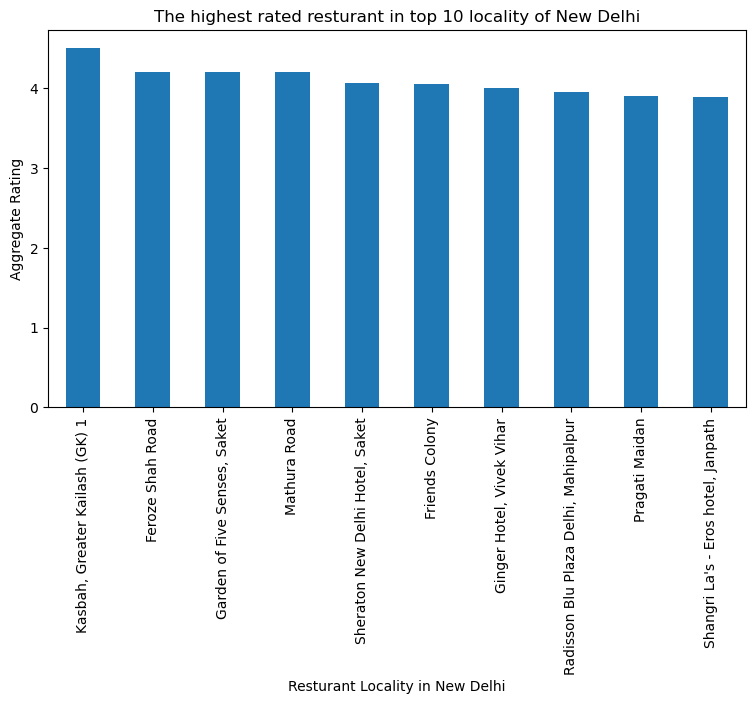

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

While to figure the resturants with low quality services

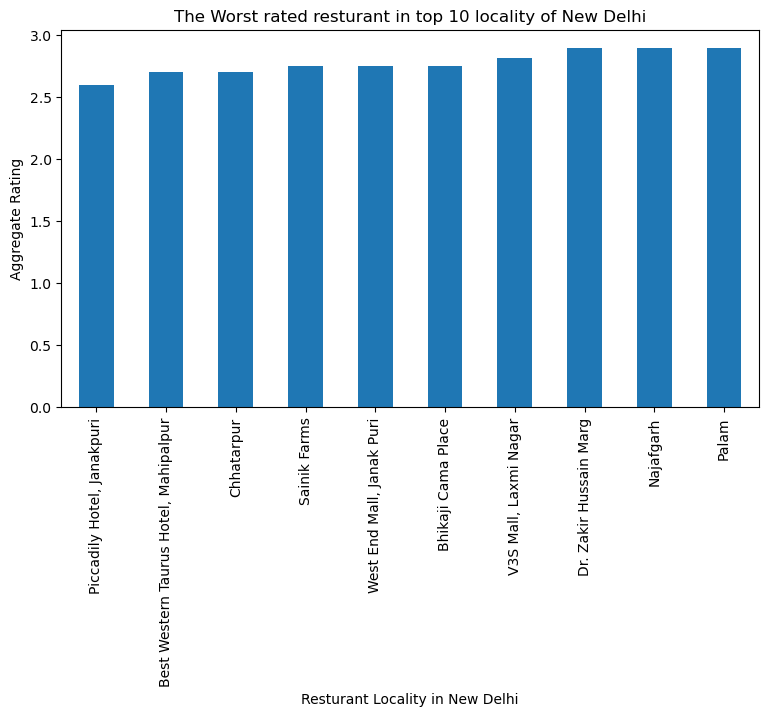

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The highest number of Restaurant available in Locality of New Delhi

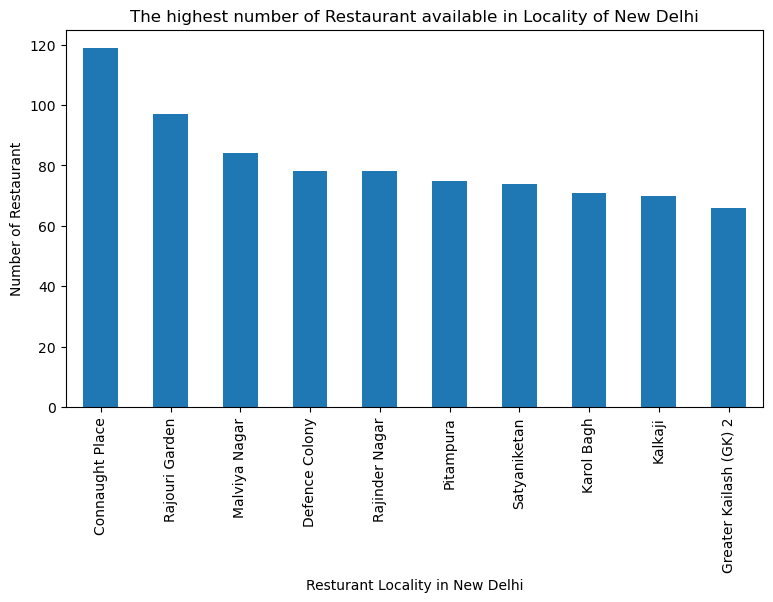

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

The lowest number of Restaurant available in Locality of New Delhi

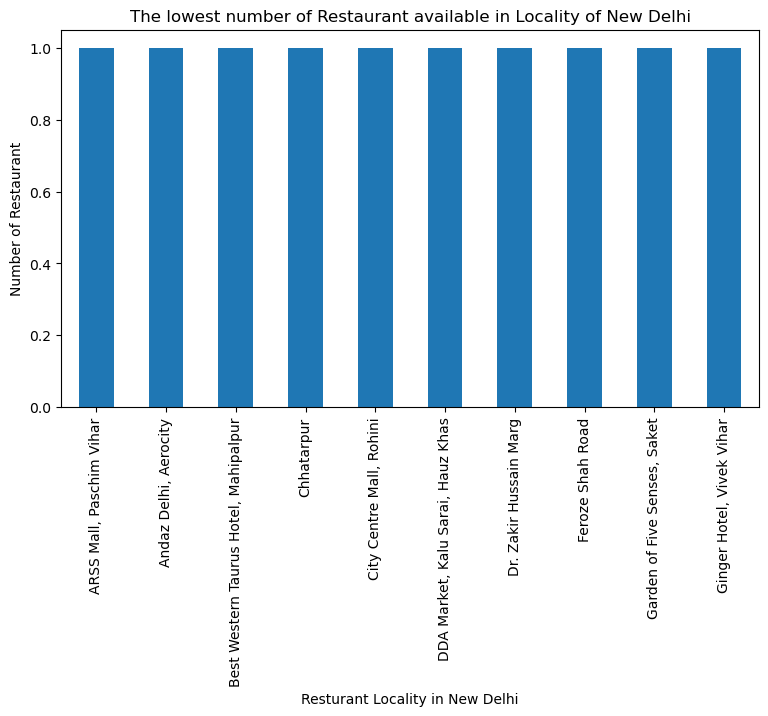

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

The best Locality for chinese restaurant in New Delhi city

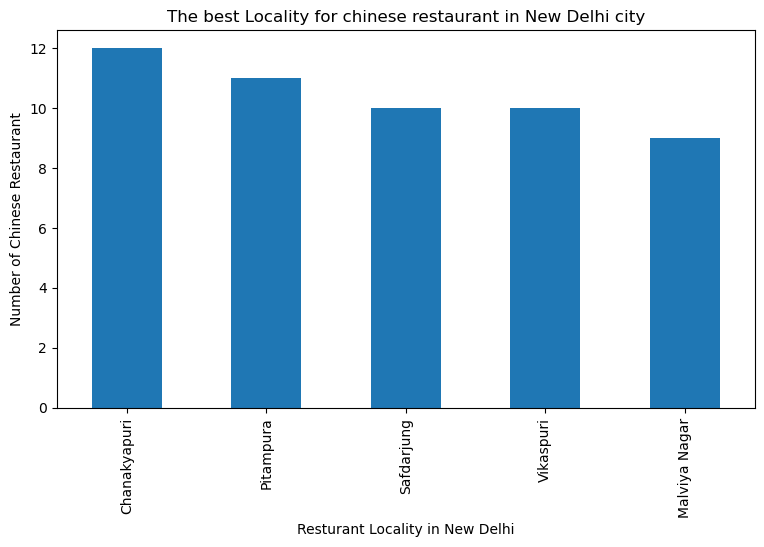

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

The best places for Chinese restaurant in New Delhi city

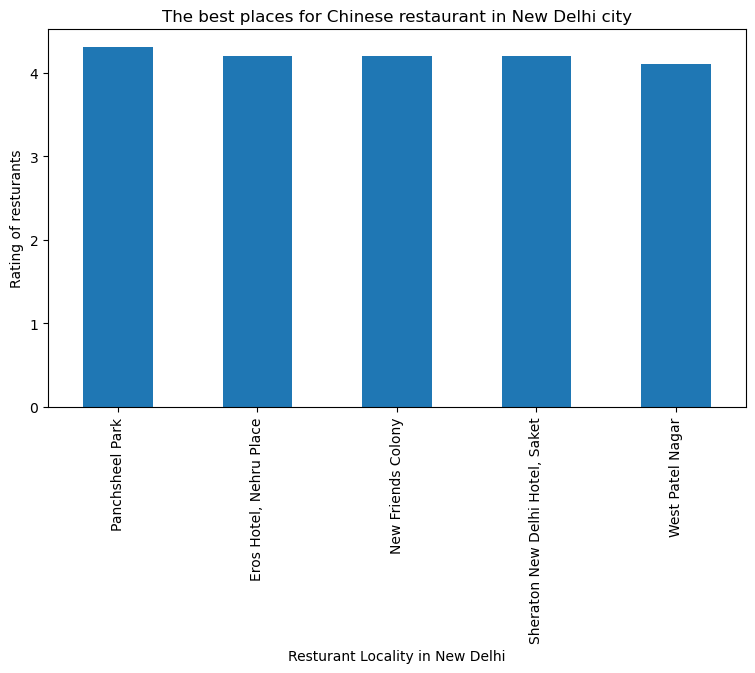

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

Data transformation

In [15]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [16]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [17]:
df_final.shape

(240, 8)

Foursquare Credentials and Version

In [18]:
## Define Foursquare Credentials and Version
CLIENT_ID = '0MMSYI02PHDXT2SLURHXFXARPHCSNGA0RLOUMLSMW3XJE5HE' # Foursquare ID
CLIENT_SECRET = 'B3HZQEIKBSHFGIRGX5GKVHDBCR5241VNGK1B33TPAYYAWTRV' # Foursquare Secret
VERSION = '20200815' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0MMSYI02PHDXT2SLURHXFXARPHCSNGA0RLOUMLSMW3XJE5HE
CLIENT_SECRET:B3HZQEIKBSHFGIRGX5GKVHDBCR5241VNGK1B33TPAYYAWTRV


In [19]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The venues in all New Delhi Locality

In [22]:
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [23]:
df_final.groupby('Locality').count()

Lat  Lng  No_of_Restaurant  Cusines  \
Locality                                                              
ARSS Mall, Paschim Vihar          1    1                 1        1   
Adchini                           1    1                 1        1   
Aditya Mega Mall, Karkardooma     1    1                 1        1   
Aerocity                          1    1                 1        1   
Aggarwal City Mall, Pitampura     1    1                 1        1   
...                             ...  ...               ...      ...   
West Gate Mall, Rajouri Garden    1    1                 1        1   
West Patel Nagar                  1    1                 1        1   
Worldmark 1, Aerocity             1    1                 1        1   
Yusuf Sarai                       1    1                 1        1   
ibis New Delhi, Aerocity          1    1                 1        1   

                                Agg_Rating  Comments  No_of_Votes  
Locality                                                           
ARSS Mall, Paschim Vihar                 1         1            1  
Adchini                                  1         1            1  
Aditya Mega Mall, Karkardooma            1         1            1  
Aerocity                                 1         1            1  
Aggarwal City Mall, Pitampura            1         1            1  
...                                    ...       ...          ...  
West Gate Mall, Rajouri Garden           1         1            1  
West Patel Nagar                         1         1            1  
Worldmark 1, Aerocity                    1         1            1  
Yusuf Sarai                              1         1            1  
ibis New Delhi, Aerocity                 1         1            1  

[240 rows x 7 columns]

In [25]:
## Analyze Each Locality
# add Locality column back to dataframe
df_final['Locality'] = df_final['Locality'] 

# move Locality column to the first column
column_list = df_final.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
df_final = df_final[column_list]

df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [26]:
New_Delhi_grouped = df_final.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality        Lat        Lng  No_of_Restaurant  \
0          ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                           Adchini  28.537063  77.197808                13   
2     Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                          Aerocity  28.553077  77.104270                 2   
4     Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   
..                              ...        ...        ...               ...   
235  West Gate Mall, Rajouri Garden  28.652978  77.123116                 1   
236                West Patel Nagar  28.648177  77.166667                 4   
237           Worldmark 1, Aerocity  28.550257  77.121721                 5   
238                     Yusuf Sarai  28.559928  77.208290                16   
239        ibis New Delhi, Aerocity  28.551398  77.123127                 1   

     Agg_Rating  No_of_Votes  
0      3.100000          117  
1      3.292308         1560  
2      3.275000          434  
3      3.200000           59  
4      3.033333          126  
..          ...          ...  
235    3.500000          178  
236    3.675000          876  
237    3.220000           77  
238    3.075000          923  
239    3.100000            9  

[240 rows x 6 columns]

In [27]:
New_Delhi_grouped.shape

(240, 6)

In [28]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
              venue    freq
0       No_of_Votes  117.00
1               Lng   77.10
2               Lat   28.67
3        Agg_Rating    3.10
4  No_of_Restaurant    1.00


----Adchini----
              venue     freq
0       No_of_Votes  1560.00
1               Lng    77.20
2               Lat    28.54
3  No_of_Restaurant    13.00
4        Agg_Rating     3.29


----Aditya Mega Mall, Karkardooma----
              venue    freq
0       No_of_Votes  434.00
1               Lng   77.30
2               Lat   28.66
3  No_of_Restaurant    4.00
4        Agg_Rating    3.27


----Aerocity----
              venue   freq
0               Lng  77.10
1       No_of_Votes  59.00
2               Lat  28.55
3        Agg_Rating   3.20
4  No_of_Restaurant   2.00


----Aggarwal City Mall, Pitampura----
              venue    freq
0       No_of_Votes  126.00
1               Lng   77.13
2               Lat   28.69
3        Agg_Rating    3.03
4  No_of_Restaurant    3.00


----Agga

In [29]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(240,)

In [35]:
# add clustering labels
New_Delhi_merged = df_final.head(240)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               0   
2                   Average, Good          434               0   
3                         Average           59               0   
4                         Average          126               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

  10th Most Common Venue  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

In [36]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters